In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
pip install scikit-learn

  Using cached scikit_learn-1.3.0-cp39-cp39-macosx_10_9_x86_64.whl (10.2 MB)
  Using cached scipy-1.11.1-cp39-cp39-macosx_10_9_x86_64.whl (37.2 MB)
  Using cached joblib-1.3.1-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 28.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 15.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
fitbit_mean_df = pd.read_csv("fitbit_mean_miles_df.csv")
fitbit_flushed_df = pd.read_csv("fitbit_flushed_miles_df.csv")

NameError: name 'pd' is not defined

# Creating 1st linear regression daily steps to daily calories burned (mean df)

### Set dependent and independent variables:

In [68]:
fitbit_flushed_df.describe()

,Id,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,8.420000e+02,842.000000,842.000000,842.000000,842.000000,842.000000,842.00000,842.000000
mean,4.878428e+09,8523.338480,3.806591,23.585511,15.121140,215.024941,948.63658,2379.742280
std,2.413243e+09,4622.239505,2.266522,33.866359,20.556631,92.553744,272.01410,696.647606
min,1.503960e+09,590.000000,0.260000,0.000000,0.000000,0.000000,13.00000,52.000000
25%,2.320127e+09,5093.000000,2.180000,0.000000,0.000000,151.000000,720.00000,1876.500000
50%,4.558610e+09,8198.500000,3.550000,8.000000,8.000000,212.500000,1017.50000,2233.500000
75%,6.962181e+09,11167.750000,4.980000,36.000000,21.000000,273.750000,1182.00000,2846.000000
max,8.877689e+09,36019.000000,17.420000,210.000000,143.000000,518.000000,1440.00000,4900.000000


In [47]:
y = fitbit_mean_df['Calories']
x1 = fitbit_mean_df['TotalSteps']

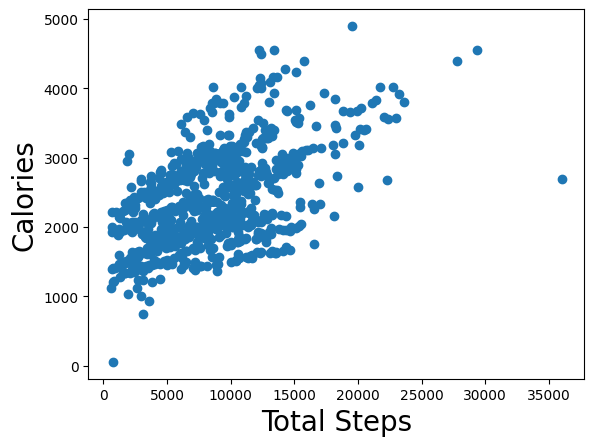

In [14]:
plt.scatter(x1,y)
plt.xlabel('Total Steps', fontsize = 20)
plt.ylabel('Calories', fontsize = 20)
plt.show()

In [15]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     402.9
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           7.79e-75
Time:                        14:08:30   Log-Likelihood:                -7267.1
No. Observations:                 940   AIC:                         1.454e+04
Df Residuals:                     938   BIC:                         1.455e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1675.5889     39.427     42.498      0.000    1598.213    1752.965
TotalSteps     0.0826      0.004     20.072      0.000       0.075       0.091
==============================================================================
Omnibus:                       20.377   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.487
Skew:                           0.334   Prob(JB):                     2.16e-05
Kurtosis:                       3.319   Cond. No.                     2.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
x.shape

(940, 2)

In [21]:
y.shape

(940,)

In [19]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(1880, 1)

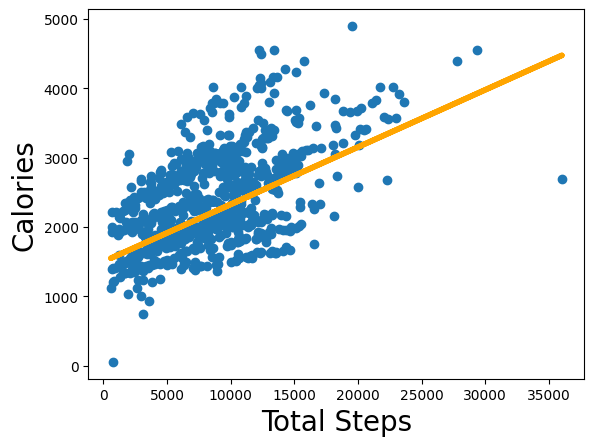

In [49]:
plt.scatter(x1,y)
yhat = 0.0826*x1 + 1675
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Total Steps', fontsize = 20)
plt.ylabel('Calories', fontsize = 20)
plt.show()

## Findings:

# Creating 2nd linear regression Total Daily Distance to Daily Calories Burned

### Set dependent and independent variables:

In [25]:
y = fitbit_mean_df['Calories']
x1 = fitbit_mean_df['TotalDistance']

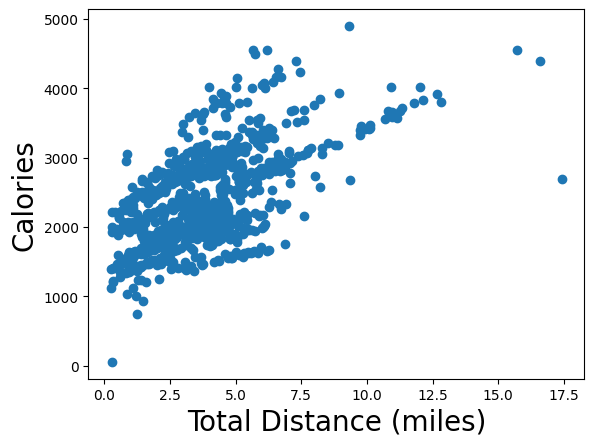

In [31]:
plt.scatter(x1,y)
plt.xlabel('Total Distance (miles)', fontsize = 20)
plt.ylabel('Calories', fontsize = 20)
plt.show()

In [27]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     571.6
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           5.05e-99
Time:                        14:39:55   Log-Likelihood:                -7211.4
No. Observations:                 940   AIC:                         1.443e+04
Df Residuals:                     938   BIC:                         1.444e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1659.7234     34.563     48.020      0.000    1591.893    1727.554
TotalDistance   189.1328      7.911     23.908      0.000     173.608     204.658
==============================================================================
Omnibus:                       33.868   Durbin-Watson:                   0.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.400
Skew:                           0.374   Prob(JB):                     3.76e-10
Kurtosis:                       3.741   Cond. No.                         9.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

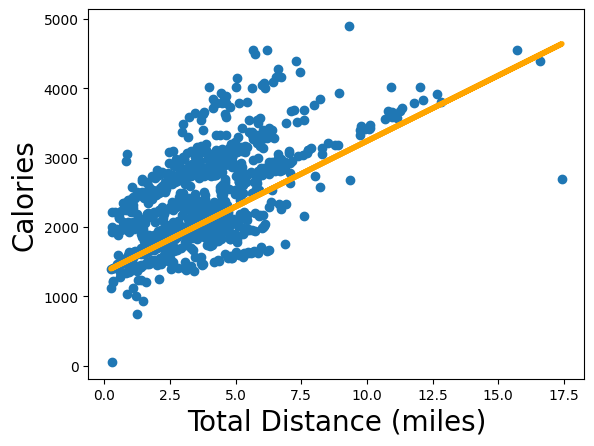

In [30]:
plt.scatter(x1,y)
yhat = 189.1328 * x1 + 1347
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Total Distance (miles)', fontsize = 20)
plt.ylabel('Calories', fontsize = 20)
plt.show()

## Findings:

# Creating 3rd linear regression daily steps to daily calories burned

### Set dependent and independent variables:

In [72]:
y = fitbit_mean_df['Calories']
x1 = fitbit_mean_df['VeryActiveMinutes']

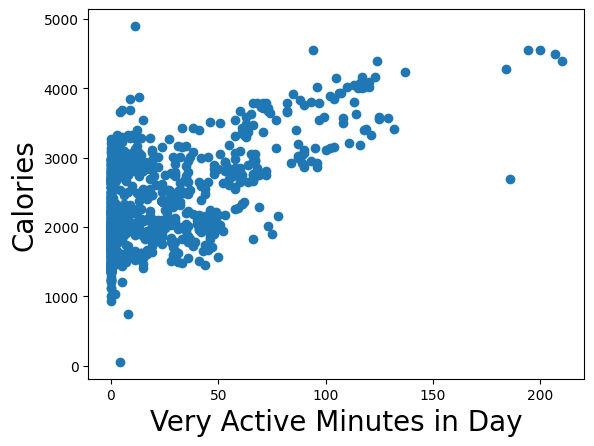

In [36]:
plt.scatter(x1,y)
plt.xlabel('Very Active Minutes in Day', fontsize = 20)
plt.ylabel('Calories', fontsize = 20)
plt.show()

In [37]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     558.0
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           3.53e-97
Time:                        15:04:22   Log-Likelihood:                -7215.6
No. Observations:                 940   AIC:                         1.444e+04
Df Residuals:                     938   BIC:                         1.444e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2083.4279     21.156     98.478      0.000    2041.909    2124.947
VeryActiveMinutes    12.5631      0.532     23.622      0.000      11.519      13.607
==============================================================================
Omnibus:                       27.058   Durbin-Watson:                   0.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.904
Skew:                           0.335   Prob(JB):                     7.16e-08
Kurtosis:                       3.626   Cond. No.                         49.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

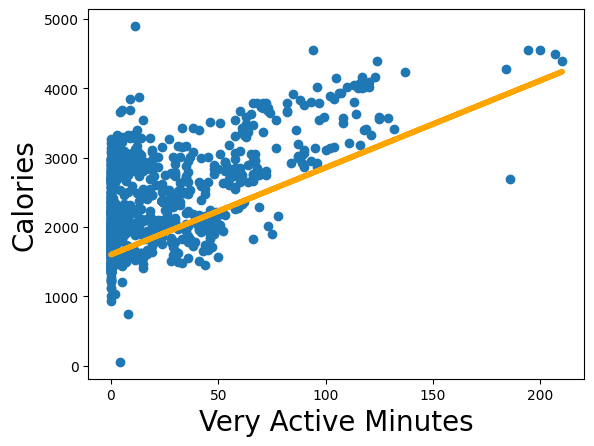

In [75]:
plt.scatter(x1,y)
yhat = 12.5631 * x1 + 1600
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Very Active Minutes', fontsize = 20)
plt.ylabel('Calories', fontsize = 20)
plt.show()

In [ ]:
# Assuming you have already loaded the data and performed the regression as mentioned before

# Add a constant column for the intercept term in the regression
X = sm.add_constant(x1)

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the predicted values from the model
predicted_values = model.predict(X)

# Create a DataFrame with actual and predicted values for visualization
visualization_data = pd.DataFrame({'Actual': y, 'Predicted': predicted_values})

# Plot the scatter plot of actual vs. predicted values
sns.scatterplot(x='Predicted', y='Actual', data=visualization_data)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Creating Multi Variate regression with all three independent variables

In [56]:
y = fitbit_mean_df['Calories']
x1 = fitbit_mean_df[['TotalDistance','VeryActiveMinutes','TotalSteps']]

In [57]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     362.8
Date:                Wed, 02 Aug 2023   Prob (F-statistic):          3.00e-156
Time:                        09:46:32   Log-Likelihood:                -7072.5
No. Observations:                 940   AIC:                         1.415e+04
Df Residuals:                     936   BIC:                         1.417e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1982.8466     35.071     56.537      0.000    1914.019    2051.674
TotalDistance       585.5795     36.361     16.105      0.000     514.221     656.938
VeryActiveMinutes     7.4989      0.619     12.116      0.000       6.284       8.714
TotalSteps           -0.2357      0.018    -13.389      0.000      -0.270      -0.201
==============================================================================
Omnibus:                       35.568   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.619
Skew:                          -0.023   Prob(JB):                     1.05e-21
Kurtosis:                       4.570   Cond. No.                     2.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Creating Multi Variate regression with 2 independent variables

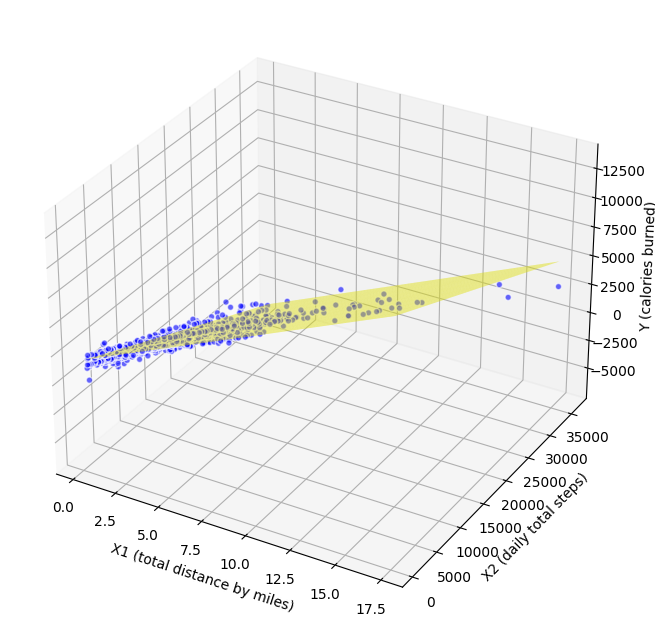

In [155]:
# Assuming df is your dataframe, X1 and X2 are independent variables, and Y is dependent variable
X = fitbit_mean_df[['TotalDistance', 'TotalSteps']]
Y = fitbit_mean_df['Calories']

# Add a constant to the independent value
X = sm.add_constant(X)

# Run the regression model
model = sm.OLS(Y, X)
results = model.fit()

# Create a grid of x and y values to calculate plane at
xx1, xx2 = np.meshgrid(np.linspace(X['TotalDistance'].min(), X['TotalDistance'].max(), 100), 
                       np.linspace(X['TotalSteps'].min(), X["TotalSteps"].max(), 100))

# calculate corresponding z values (plane)
Z = results.params[0] + results.params[1] * xx1 + results.params[2] * xx2

# create 3d axes
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# plot scatter points
ax.scatter(X['TotalDistance'], X['TotalSteps'], Y, color='blue', alpha=0.6, facecolors='blue', edgecolors='w')

# plot the plane
ax.plot_surface(xx1, xx2, Z, color='yellow', alpha=0.5)

ax.set_xlabel('X1 (total distance by miles)')
ax.set_ylabel('X2 (daily total steps)')
ax.set_zlabel('Y (calories burned)')

plt.show()

# Testing with alternate dropped data

## Creating 1st linear regression daily steps to daily calories burned (dropped df) 

In [58]:
y = fitbit_flushed_df['Calories']
x1 = fitbit_flushed_df['TotalSteps']

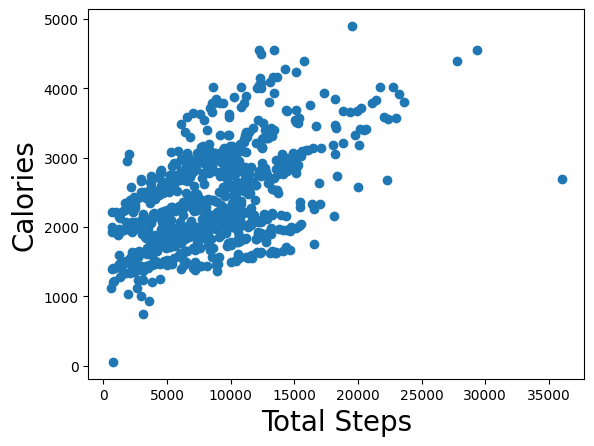

In [59]:
plt.scatter(x1,y)
plt.xlabel('Total Steps', fontsize = 20)
plt.ylabel('Calories', fontsize = 20)
plt.show()

In [60]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     360.8
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           3.31e-67
Time:                        12:17:17   Log-Likelihood:                -6555.8
No. Observations:                 842   AIC:                         1.312e+04
Df Residuals:                     840   BIC:                         1.313e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1675.5891     42.166     39.738      0.000    1592.827    1758.352
TotalSteps     0.0826      0.004     18.995      0.000       0.074       0.091
==============================================================================
Omnibus:                       13.638   Durbin-Watson:                   0.322
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.062
Skew:                           0.316   Prob(JB):                     0.000884
Kurtosis:                       2.973   Cond. No.                     2.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Same R-Squared and Coefficient as simple linear regression above 

    - Same line of best fit + same affect on the variance (explains 30% of variance of calories)
    - f-statistic is lower by 40 points
    

## Creating 2nd linear regression total distance to daily calories burned (dropped df)

In [62]:
y = fitbit_flushed_df['Calories']
x1 = fitbit_flushed_df['TotalDistance']

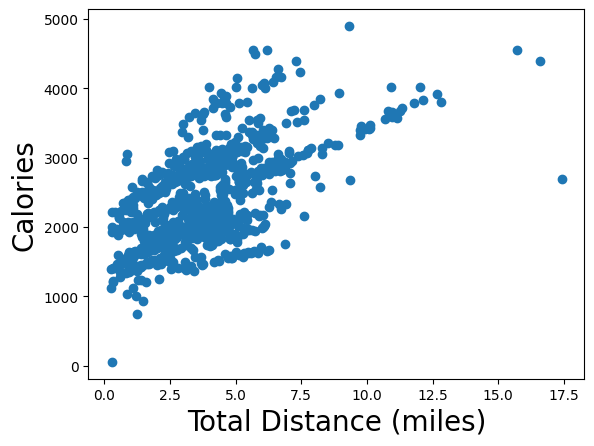

In [63]:
plt.scatter(x1,y)
plt.xlabel('Total Distance (miles)', fontsize = 20)
plt.ylabel('Calories', fontsize = 20)
plt.show()

In [64]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     511.9
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           7.14e-89
Time:                        12:22:16   Log-Likelihood:                -6505.9
No. Observations:                 842   AIC:                         1.302e+04
Df Residuals:                     840   BIC:                         1.303e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1659.7907     37.029     44.824      0.000    1587.110    1732.472
TotalDistance   189.1329      8.360     22.625      0.000     172.725     205.541
==============================================================================
Omnibus:                       20.560   Durbin-Watson:                   0.402
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.848
Skew:                           0.353   Prob(JB):                     1.80e-05
Kurtosis:                       3.351   Cond. No.                         8.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Same R-Squared and Coefficient as simple linear regression above 

    - Same line of best fit + same affect on the variance (explains 38% of variance of calories)
    - F statistic is lower by 60 points

## Creating 3rd linear regression Very Active Minutes to daily calories burned (dropped df)

In [69]:
y = fitbit_flushed_df['Calories']
x1 = fitbit_flushed_df['VeryActiveMinutes']

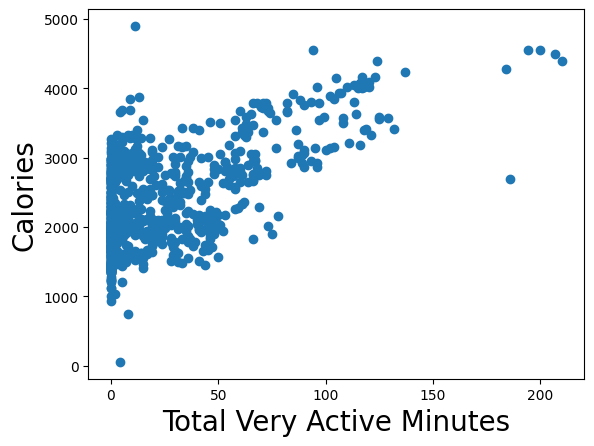

In [70]:
plt.scatter(x1,y)
plt.xlabel('Total Very Active Minutes', fontsize = 20)
plt.ylabel('Calories', fontsize = 20)
plt.show()

In [71]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     499.7
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           3.20e-87
Time:                        12:25:55   Log-Likelihood:                -6509.7
No. Observations:                 842   AIC:                         1.302e+04
Df Residuals:                     840   BIC:                         1.303e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2083.4341     23.185     89.863      0.000    2037.928    2128.941
VeryActiveMinutes    12.5631      0.562     22.354      0.000      11.460      13.666
==============================================================================
Omnibus:                       15.793   Durbin-Watson:                   0.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.242
Skew:                           0.317   Prob(JB):                     0.000297
Kurtosis:                       3.248   Cond. No.                         50.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Same R-Squared and Coefficient as simple linear regression above 

    - Same line of best fit + same affect on the variance (explains 37% of variance of calories)
    - F-statistic lower by 60 points

# Creating Multi Variate regression with all three independent variables

In [76]:
y = fitbit_flushed_df['Calories']
x1 = fitbit_flushed_df[['TotalDistance','VeryActiveMinutes','TotalSteps']]

In [77]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     324.8
Date:                Wed, 02 Aug 2023   Prob (F-statistic):          7.36e-140
Time:                        12:34:58   Log-Likelihood:                -6381.5
No. Observations:                 842   AIC:                         1.277e+04
Df Residuals:                     838   BIC:                         1.279e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1983.0594     37.443     52.962      0.000    1909.566    2056.553
TotalDistance       585.5835     38.428     15.238      0.000     510.156     661.011
VeryActiveMinutes     7.4989      0.654     11.464      0.000       6.215       8.783
TotalSteps           -0.2357      0.019    -12.669      0.000      -0.272      -0.199
==============================================================================
Omnibus:                       20.352   Durbin-Watson:                   0.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.033
Skew:                          -0.024   Prob(JB):                     7.46e-10
Kurtosis:                       4.094   Cond. No.                     2.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Same R-Squared and Coefficient as multi variate regression above 

    - Same line of best fit + same affect on the variance (explains 54% of variance of calories)
    - F-statistic is 60 points lower